<a href="https://colab.research.google.com/github/nandaglhp/PCVK_Ganjil_2023/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL11 – MetodeDeteksiObjek: TemplateMatching,Edge Detection,CornerDetection,GridDetection,ContourDetection

## **Kelompok 2 - KTP Galang Raka Bengkulu**

Anggota Kelompok 2 (TI-3F) :
1. Ahmad Bima Tristan Ibrahim (01 - 2141720077)
2. Alvina Marcy Syakirah Permata (03 - 2141720017)
3. Ananda Galih Pratiwi (05 - 2141720045)
4. Azis Ilham Kurniawan (08 - 2141720145)
5. Muhammad Endar Darmawan (21 - 2141720160)

In [ ]:
#import library yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## 2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.



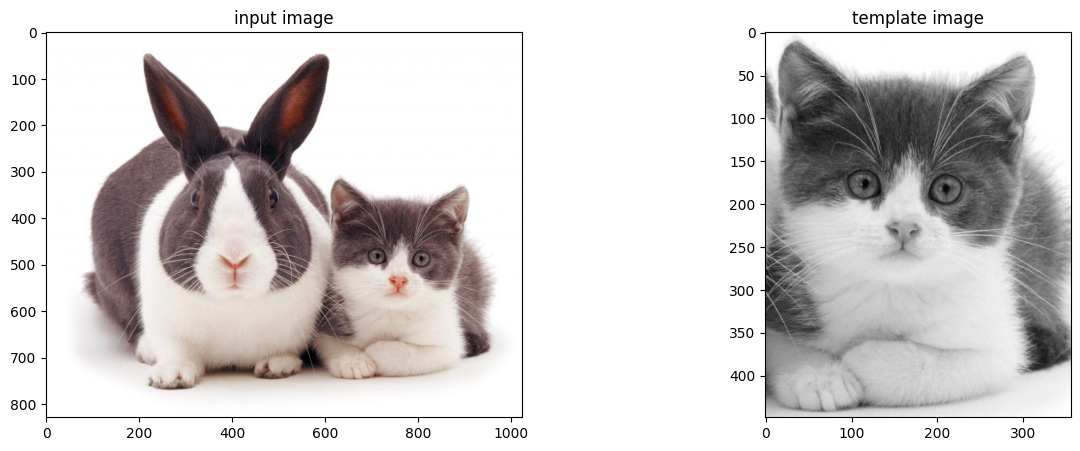

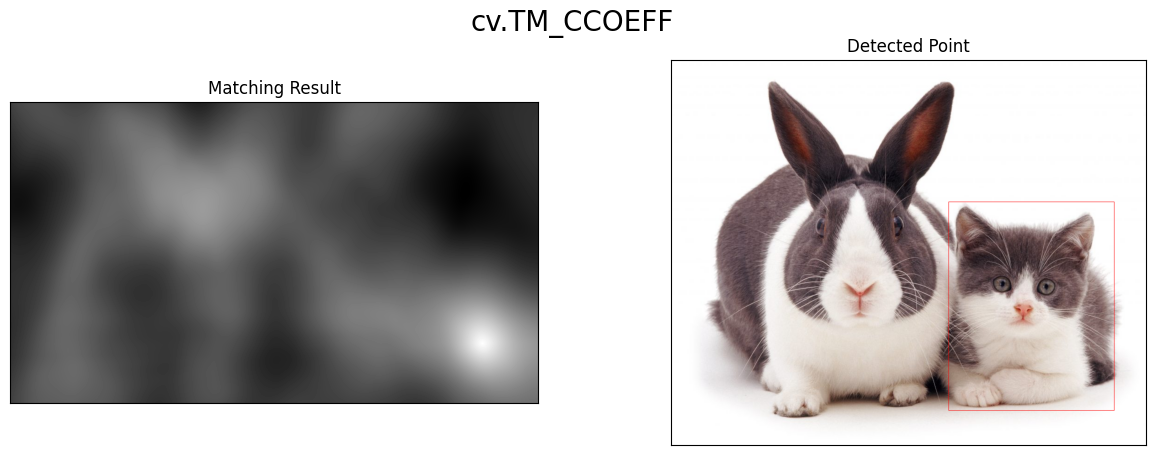

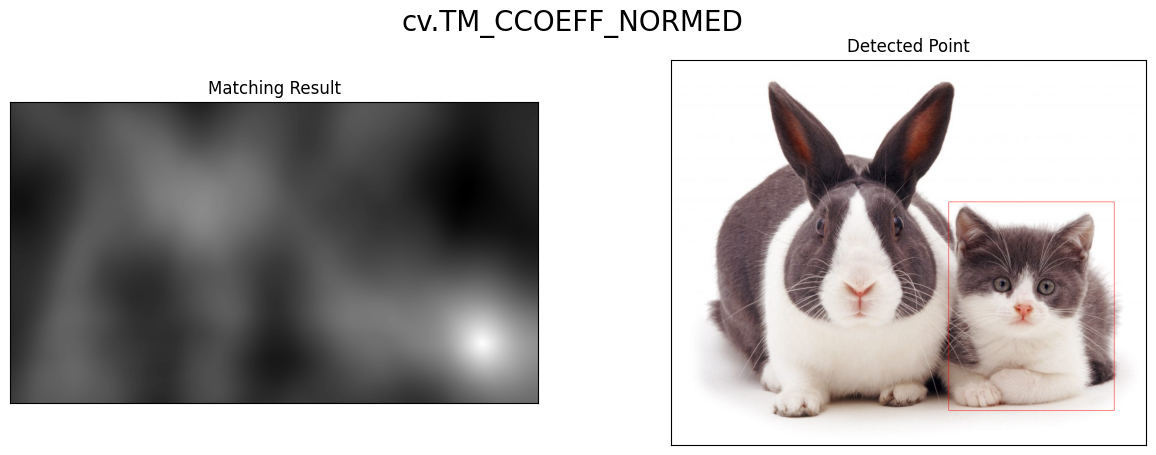

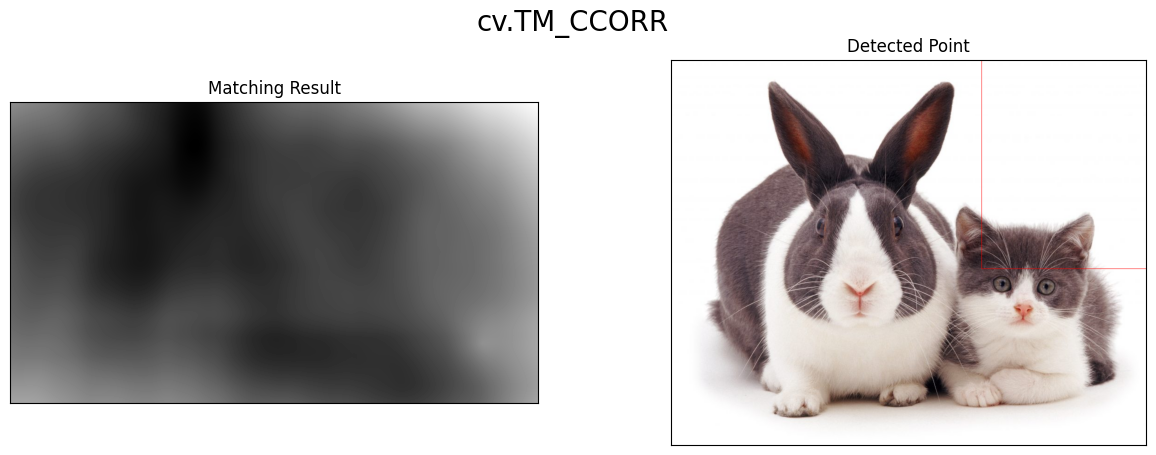

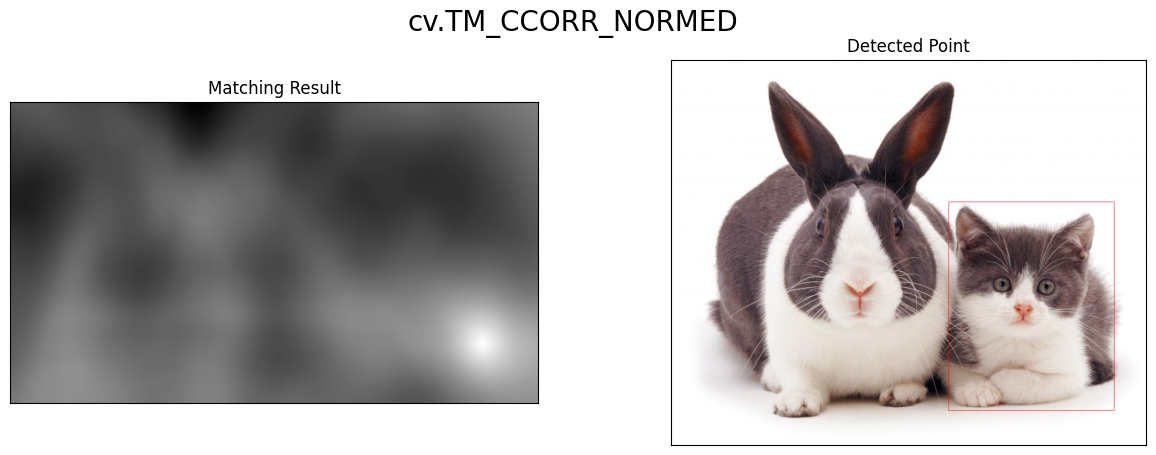

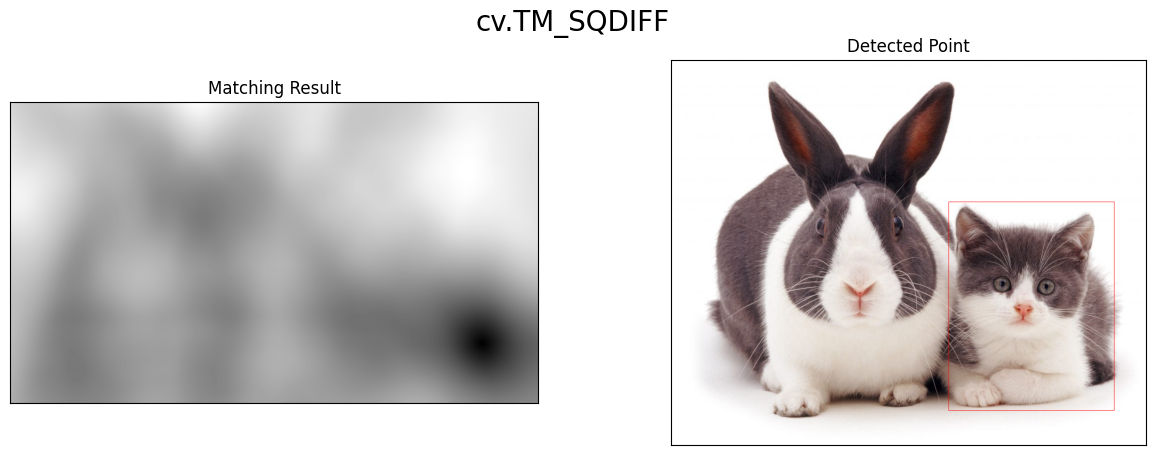

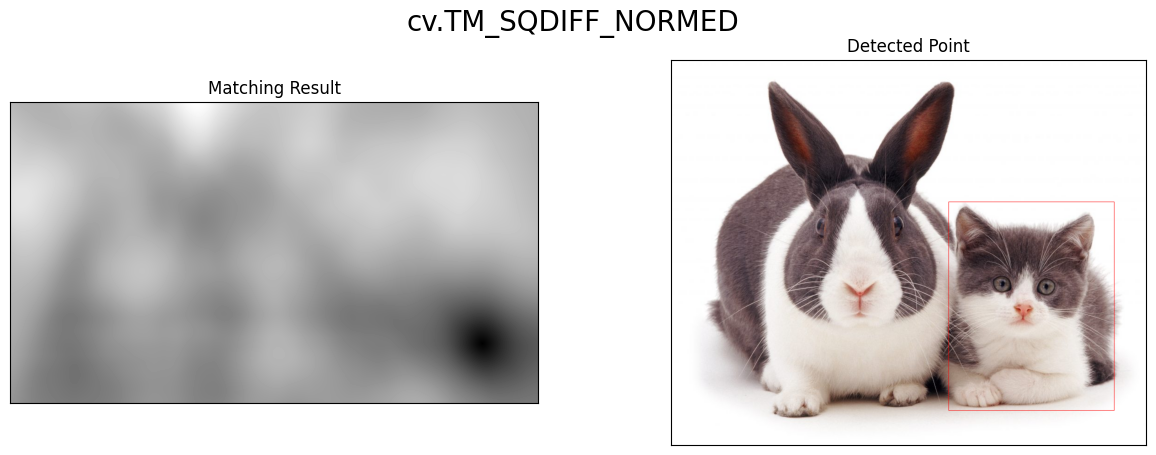

In [ ]:
# load citra input
cats_bun_path = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/Object Detection/cats_and_bunnies.jpg'
img = cv.imread(cats_bun_path)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

#load citra template
cat2_path = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/Object Detection/cat2_templatejpg.jpg'
template = cv.imread(cat2_path,0)
# dimensi citra
w, h = template.shape[::-1]

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,0,255))
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

## 3. Implementasikan konsep template matching tanpa menggunakan library OpenCV untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan bahrain-template.jpg sebagai citra template

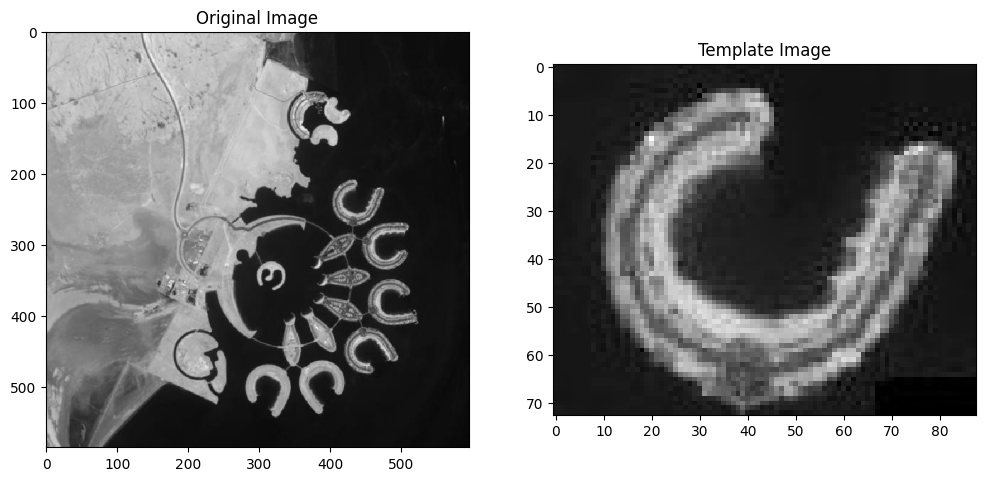

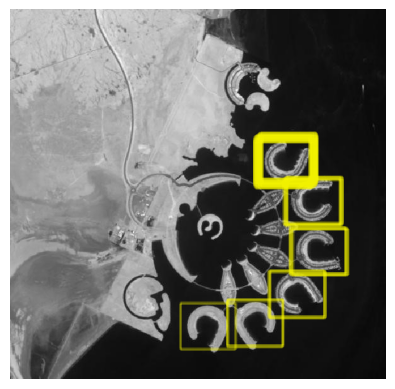

In [ ]:
from skimage.feature import match_template

bahrain_path = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/Object Detection/bahrain.jpg'
image = cv.imread(bahrain_path, 0)
bahrain_tem_path = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/Object Detection/bahrain-template.jpg'
template_image = cv.imread(bahrain_tem_path, 0)

fig, axarr = plt.subplots(1, 2, figsize=(12, 8))
axarr[0].imshow(image, cmap='gray')
axarr[0].set_title("Original Image")
axarr[1].imshow(template_image, cmap='gray')
axarr[1].set_title("Template Image")

# Hitung kemiripan citra dengan citra template
result = match_template(image, template_image)

# Tentukan threshold untuk hasil match
threshold = 0.45
locations = np.where(result >= threshold)

# Plot hasil match
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)
ax.set_axis_off()
height, width = template_image.shape
for loc in zip(*locations[::-1]):
    rect = plt.Rectangle(loc, width, height, edgecolor='yellow', facecolor='none', linewidth=0.1)
    ax.add_patch(rect)

plt.show()

## 4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg

(<Axes: >, <matplotlib.image.AxesImage at 0x7a864d893a00>)

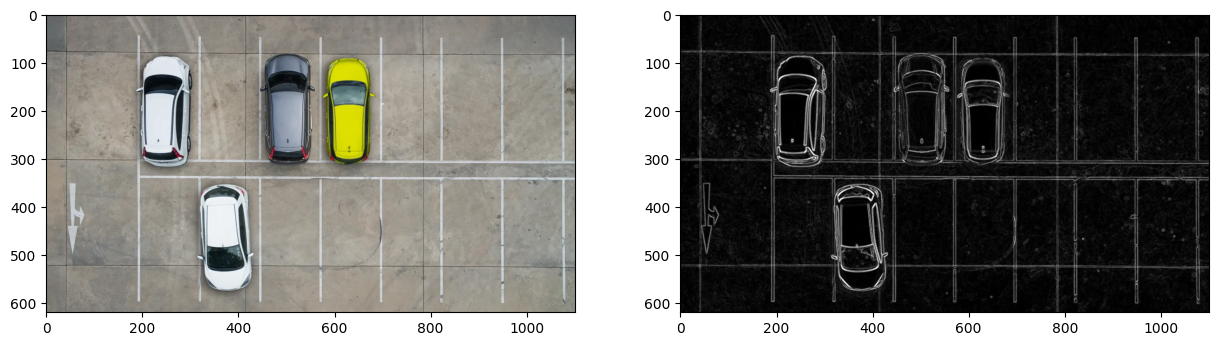

In [ ]:
# a. Sobel Edge Detection

parking_path = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/Object Detection/car-park.jpg'
img0 = cv.imread(parking_path)

# converting to gray scale
gray = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)

# remove noise
img = cv.GaussianBlur(gray,(3,3),0)

# obtaining a horizontal and vertical Sobel filtering of the image
img_sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)

# image with both horizontal and vertical Sobel kernels applied
img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(img_sobelxy,cmap = 'gray')

(<Axes: >, <matplotlib.image.AxesImage at 0x7a863f52c700>)

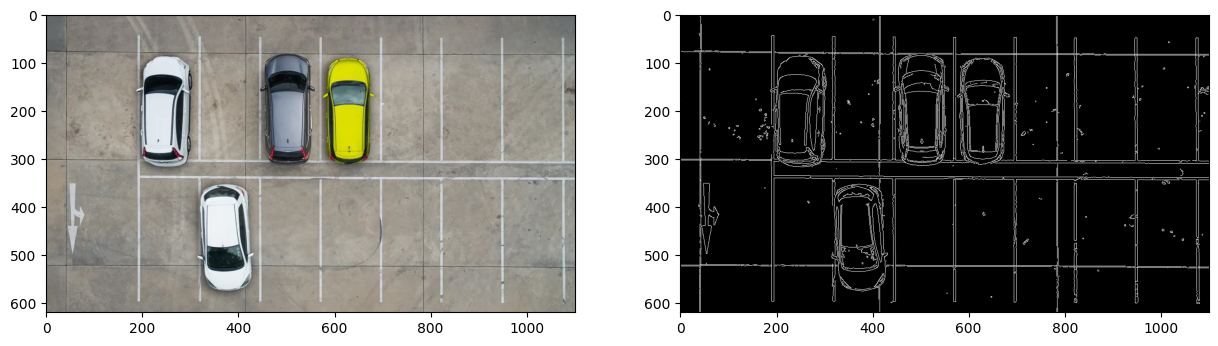

In [ ]:
# b. Canny Edge Detection

edged = cv.Canny(img0, 100, 200)

# Plot outputs
f, axarr = plt.subplots(1,2,figsize=(15,5))
plt.subplot(121), plt.imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
plt.subplot(122), plt.imshow(edged, cmap = 'gray')

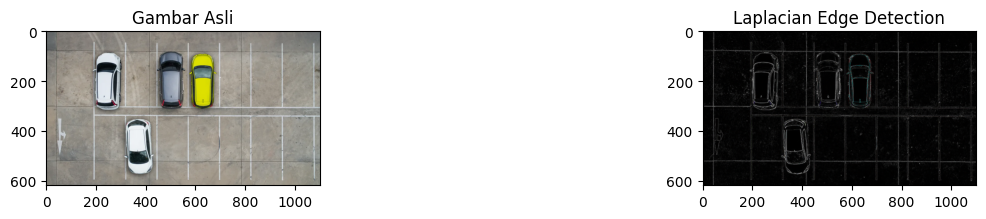

In [ ]:
# c. Laplacian Edge Detection

parking_path = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/Object Detection/car-park.jpg'

image= cv.imread(parking_path)

img_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

img_car = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Tampilkan gambar-gambar hasil
plt.figure(figsize=(12, 5))

plt.subplot(131)
plt.imshow(img_car, cmap='gray')
plt.title('Gambar Asli')

# Laplacian Edge Detection
laplacian = cv.Laplacian(image, cv.CV_64F)
laplacian_abs = cv.convertScaleAbs(laplacian)

plt.subplot(133)
plt.imshow(laplacian_abs, cmap='gray')
plt.title('Laplacian Edge Detection')

plt.show()

## 5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada OpenCV dengan menggunakan gambar chess-board.jpg

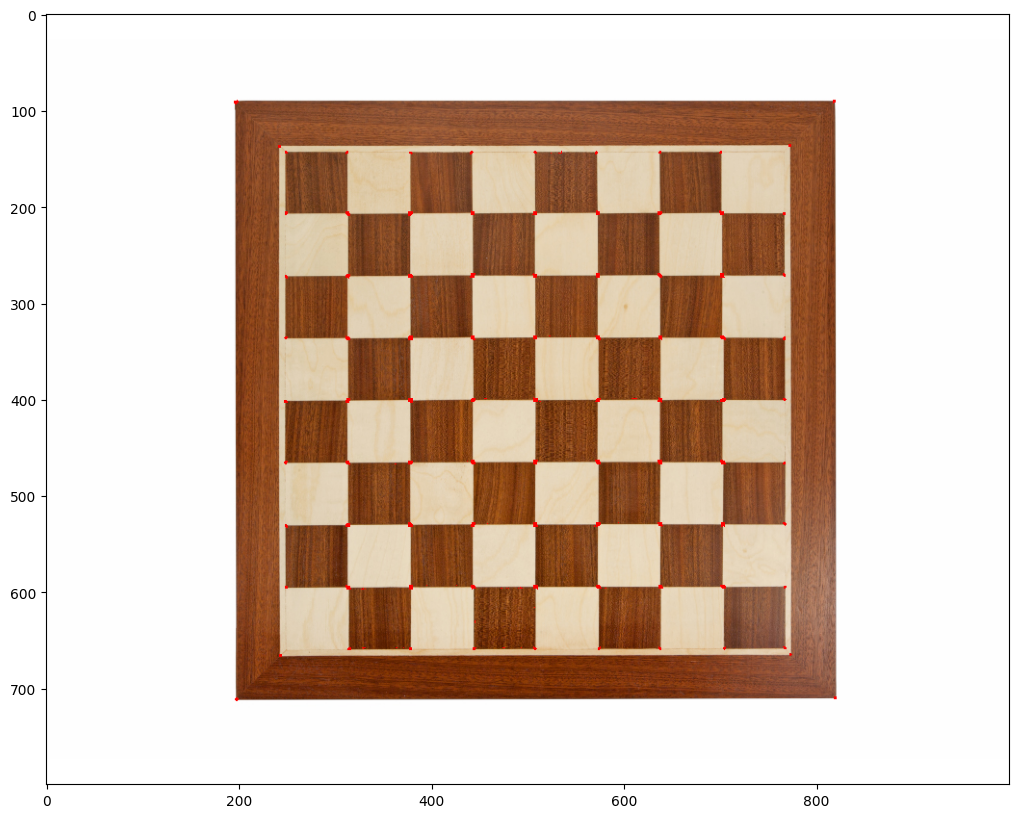

In [ ]:
# a. Harris Corner Detection

#load citra input
chess_path = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/Object Detection/chess-board.jpg'
input_img = cv.imread(chess_path)
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray_img,3,1,0.04)

gray_img = np.float32(gray_img)
harris_output = cv.cornerHarris(gray_img,2,3, 3)
#hasil harris corner dilakukan dilasi untuk menandai sudut
harris_output = cv.dilate(harris_output, None)

#Threshold untuk mengoptimalkan nilai
input_img[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

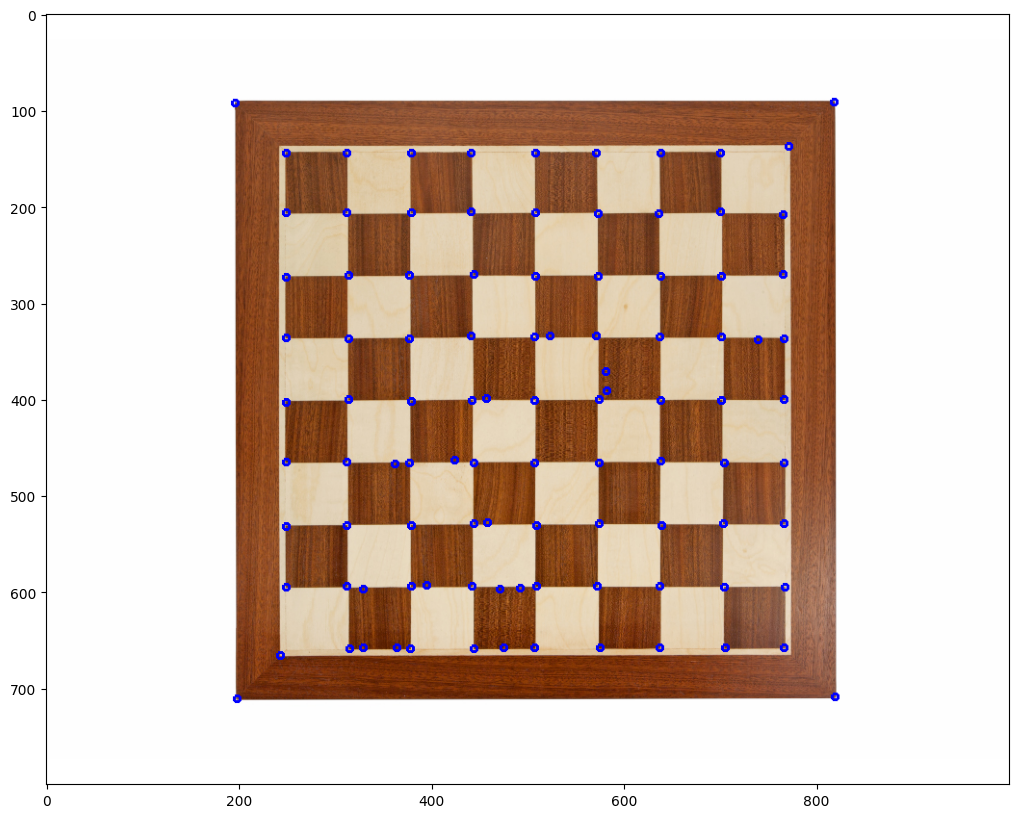

In [ ]:
# b. Shi-Tomasi Detection

#load citra input
chess_path = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/Object Detection/chess-board.jpg'
input_img = cv.imread(chess_path)
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray_img, 100,0.01,10)
corners = np. int0(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(input_img, (x,y),3,255,2)

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

## 6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan teori

number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


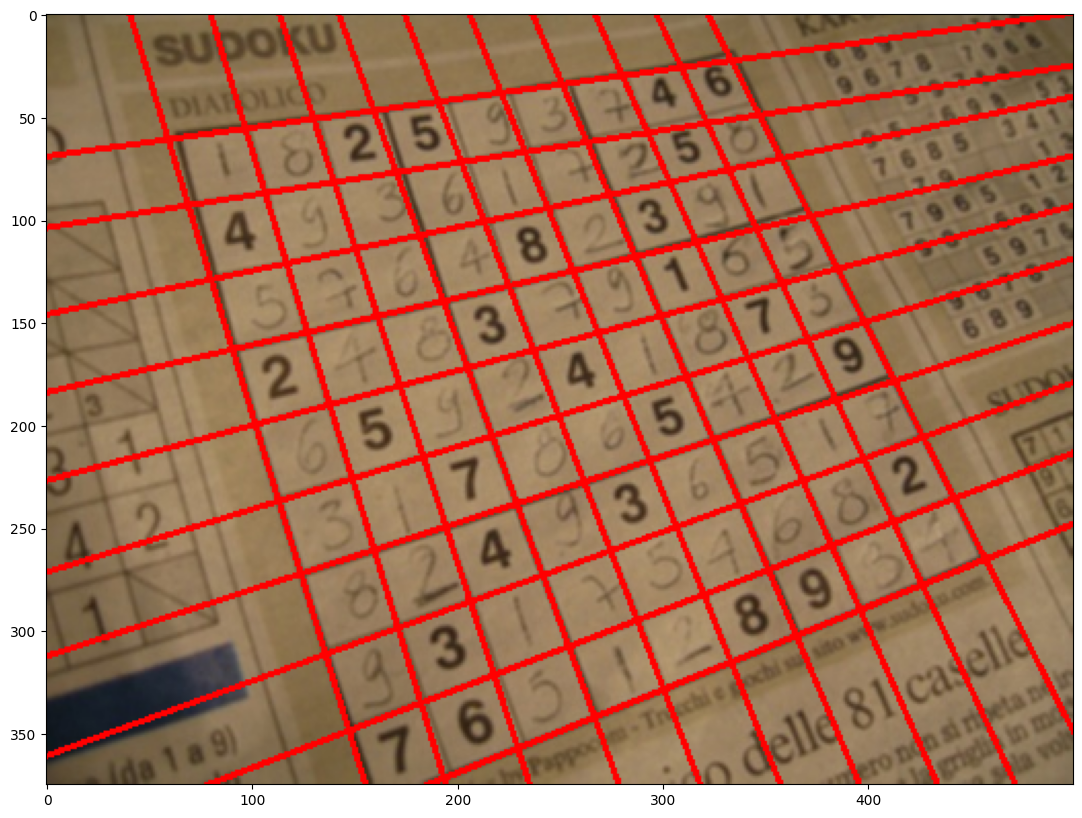

In [ ]:
sudoku_path = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/Object Detection/sudoku.jpg'
input_img = cv.imread(sudoku_path)
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8)
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8)
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines were found')
    exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1


    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
      for j in range (len (lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True]
    for i in range(len(lines) - 1):
        if not line_flags [indices[i]]:
            continue

        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines ))
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv.line(input_img, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(20,10))
    plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))


## 7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan menggunakan gambar laptop.jpg,

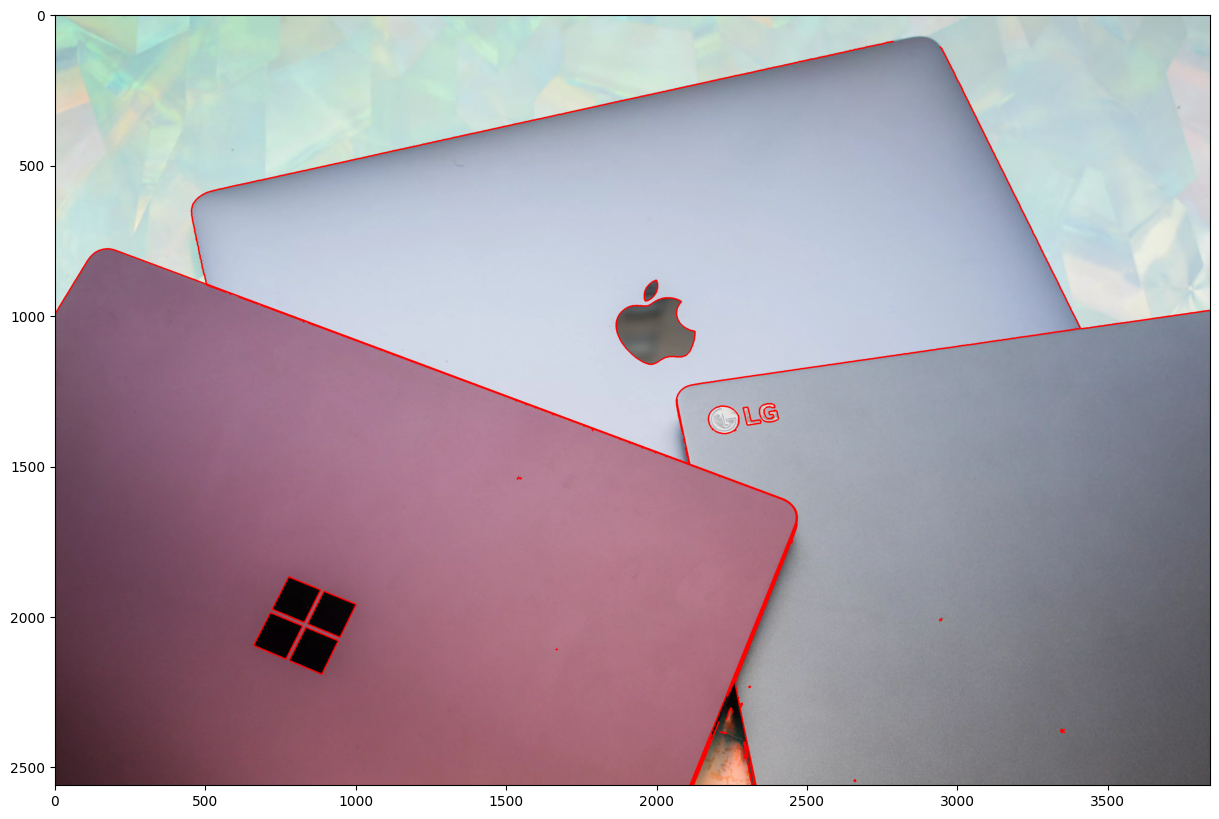

In [ ]:
laptop_path = '/content/drive/MyDrive/College/05 - Semester 5/PCVK/dataset/Object Detection/laptop.jpg'
img = cv.imread(laptop_path)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

# E. Pengayaan Materi KTP

In [ ]:
# 1. Siapkan file dataset, contoh pada praktik ini menggunakan Maftuchin Tuban

# 2. Muat 2 library berikut sebagai tahapan persiapan
import cv2
import os

In [ ]:
#3. Tambahkan kode lokalisasi dataset dan lakukan pembacaan file name di dalam
# direktori dataset tersebut

# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/College/05 - Semester 5/PCVK/KTP_More"

# KTP Machfudin
ktp_3 = "ktp3.png"

# Looping file di direktori
if ktp_3 in os.listdir(path_plate):
    image_path = os.path.join(path_plate, ktp_3)
    src = cv2.imread(os.path.join(path_plate, ktp_3))
    blurred = src.copy()
    gray = blurred.copy()

In [ ]:
# 4. Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap
# file supaya noise pickle dapat direduksi

# Filtering
for i in range(10):
 blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

In [ ]:
# 5. Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise
# dan lanjutkan dengan binerisasi citra (thresholding)

# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY
+ cv2.THRESH_OTSU)
print(ret, bw.shape)

168.0 (300, 493)


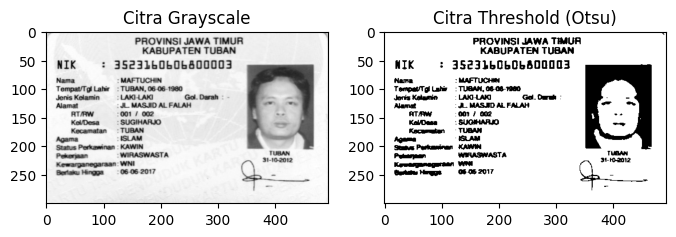

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.imshow(gray, cmap='gray')
plt.title('Citra Grayscale')

plt.subplot(122)
plt.imshow(bw, cmap='gray')
plt.title('Citra Threshold (Otsu)')

plt.show()

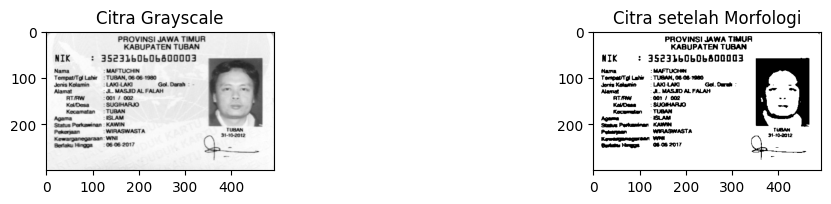

In [ ]:
# 6. Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi
# supaya setiap karakter atau obyek tidak berhimpitan.

# Operasi morfologi
kernel = np.ones((1, 1), np.uint8)
eroded_image = cv2.erode(bw, kernel, iterations=1)

# Tampilkan citra hasil morfologi
plt.figure(figsize=(10, 6))
plt.subplot(131)
plt.imshow(gray, cmap='gray')
plt.title('Citra Grayscale')

plt.subplot(133)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra setelah Morfologi')

plt.show()

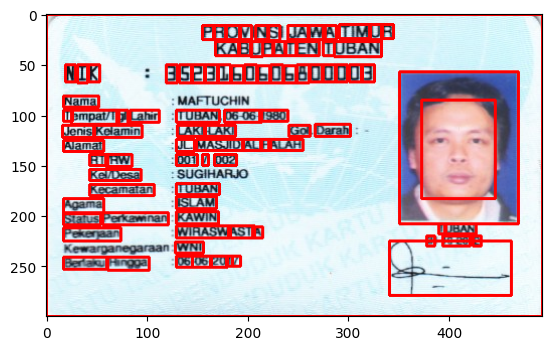

In [ ]:
# 7. Terapkan ekstraksi kontur untuk untuk mendapatkan semua kontur setiap karakter/obyek.

import matplotlib.pyplot as plt

# Load the image
image_path = os.path.join(path_plate, ktp_3)
image = cv2.imread(image_path)

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(eroded_image.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 10 and w >= 6 and float(ras) <= 6:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 15 and w >= 6 and float(ras) <= 7:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

# Menampilkan gambar image dengan kontur menggunakan plt
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

88.0 (338, 600)


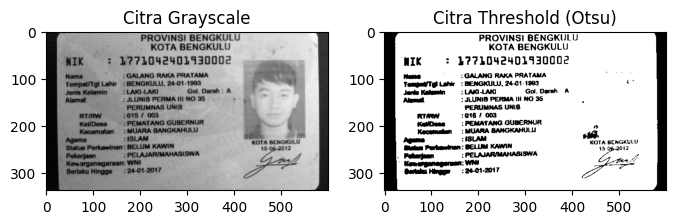

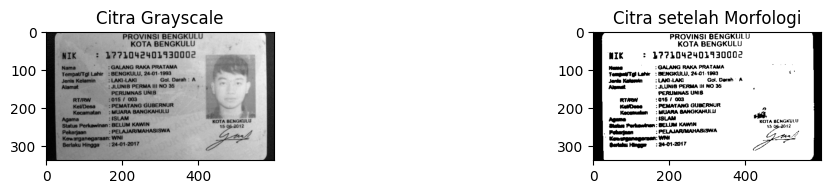

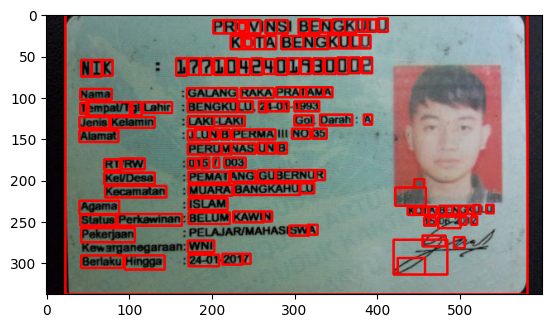

In [ ]:
# Tugas Praktikum

import cv2
import os
import matplotlib.pyplot as plt

# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/College/05 - Semester 5/PCVK/KTP_More"

# Nama file yang ingin di proses
ktp_1 = "ktp1.png"

# Looping file di direktori
if ktp_1 in os.listdir(path_plate):
    image_path = os.path.join(path_plate, ktp_1)
    src = cv2.imread(os.path.join(path_plate, ktp_1))
    blurred = src.copy()
    gray = blurred.copy()

# Filtering
for i in range(10):
  blurred = cv2.GaussianBlur(src, (5, 5), 0.5)
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY
+ cv2.THRESH_OTSU)
print(ret, bw.shape)

plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.imshow(gray, cmap='gray')
plt.title('Citra Grayscale')

plt.subplot(122)
plt.imshow(bw, cmap='gray')
plt.title('Citra Threshold (Otsu)')

plt.show()

# Operasi morfologi
kernel = np.ones((1, 1), np.uint8)
eroded_image = cv2.erode(bw, kernel, iterations=1)

# Tampilkan citra hasil morfologi
plt.figure(figsize=(10, 6))
plt.subplot(131)
plt.imshow(gray, cmap='gray')
plt.title('Citra Grayscale')

plt.subplot(133)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra setelah Morfologi')

plt.show()

# Load the image
image_path = os.path.join(path_plate, ktp_1)
image = cv2.imread(image_path)

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(eroded_image.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
   x, y, w, h = cv2.boundingRect(cnt)
   ras = format(w / h, '.2f')
   if h >= 40 and w >= 10 and float(ras) <= 1:
      cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
   elif h >= 10 and w >= 6 and float(ras) <= 6:
      cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
   elif h >= 15 and w >= 6 and float(ras) <= 7:
          cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

  # Menampilkan gambar image dengan kontur menggunakan plt
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()